In [199]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [201]:
print(train.shape)
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [202]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [203]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [204]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [205]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [206]:
train.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [207]:
train.select_dtypes(include="object")

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [208]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [209]:
train.loc[train["Embarked"] == 'S', "Embarked"] = 0
train.loc[train["Embarked"] == 'C', "Embarked"] = 1
train.loc[train["Embarked"] == 'Q', "Embarked"] = 2

test.loc[test["Embarked"] == 'S', "Embarked"] = 0
test.loc[test["Embarked"] == 'C', "Embarked"] = 1
test.loc[test["Embarked"] == 'Q', "Embarked"] = 2

In [210]:
train.loc[train["Sex"] == 'male', "Sex"] = 0
train.loc[train["Sex"] == 'female', "Sex"] = 1

test.loc[test["Sex"] == 'male', "Sex"] = 0
test.loc[test["Sex"] == 'female', "Sex"] = 1

/tmp/ipykernel_35/500852972.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/500852972.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/500852972.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/500852972.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/500852972.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


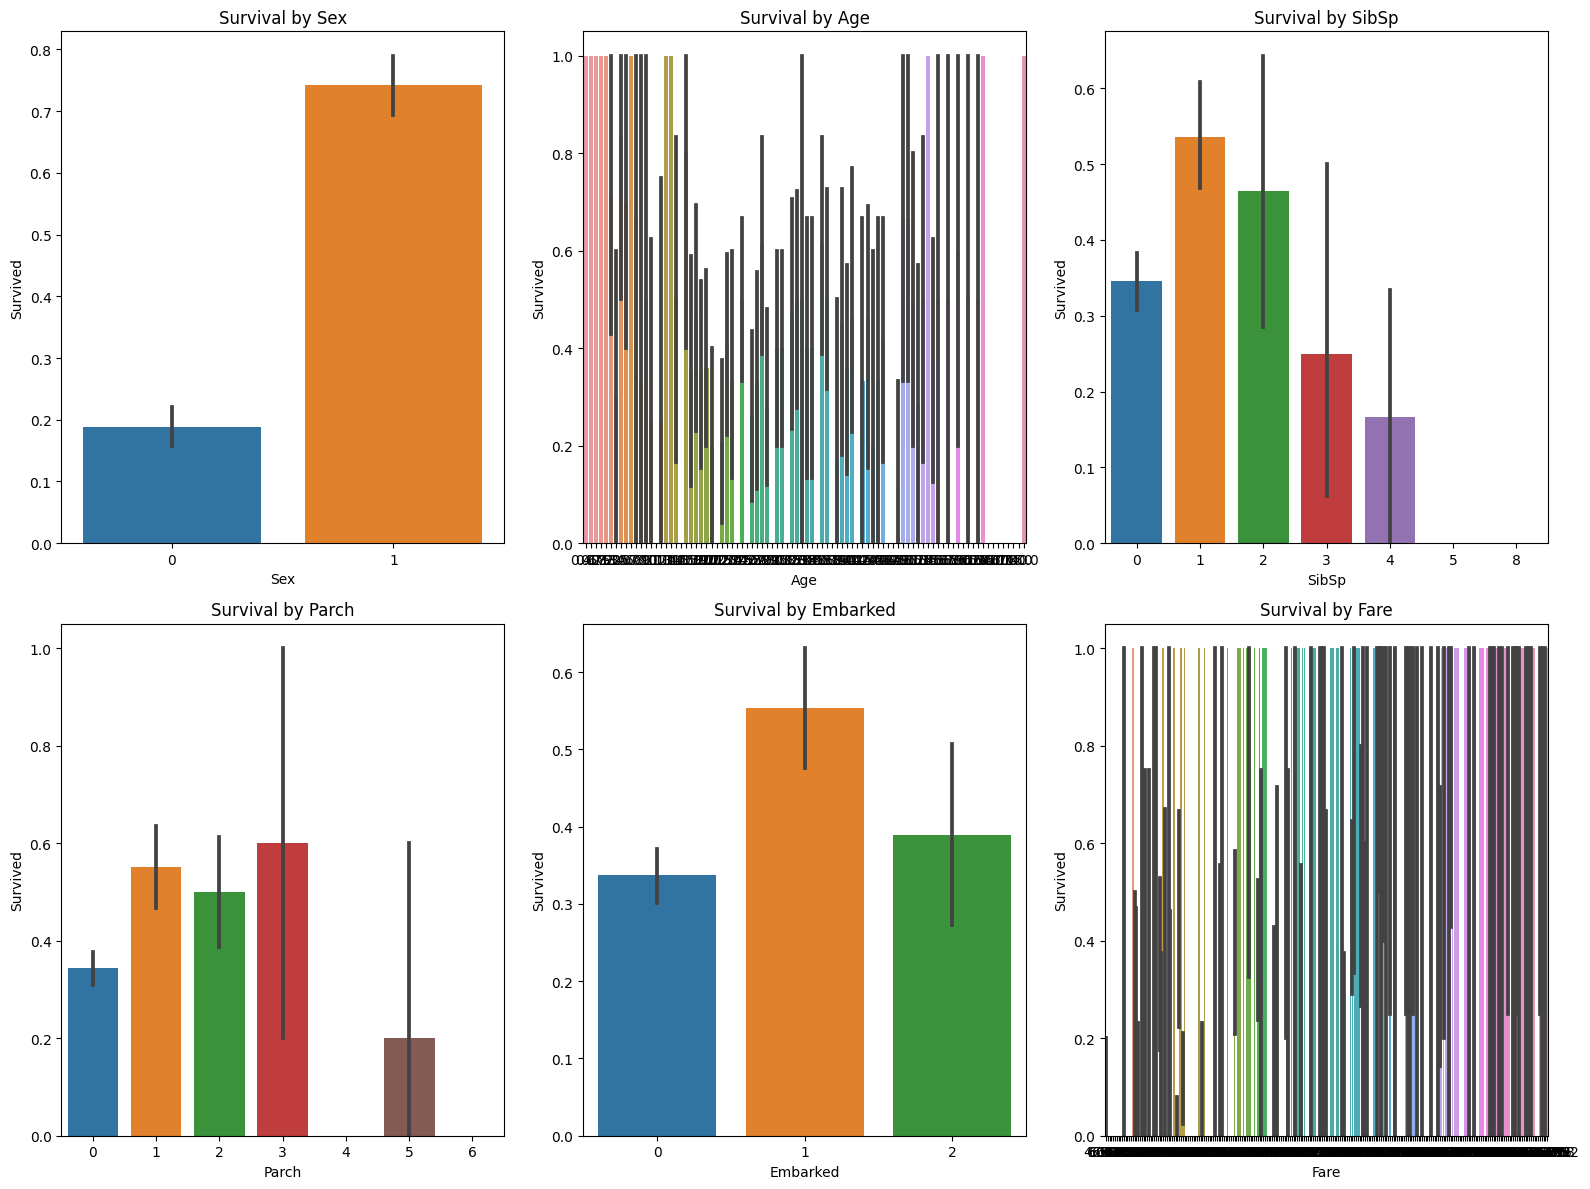

In [211]:
plt.figure(figsize=(16, 12))
columns = ['Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare']

for idx, col in enumerate(columns):
    plt.subplot(2, 3, idx + 1)  # 2행 3열로 배치
    sns.barplot(x=col, y='Survived', data=train)
    plt.title(f'Survival by {col}')
    plt.tight_layout()


<Axes: xlabel='Fare', ylabel='Survived'>

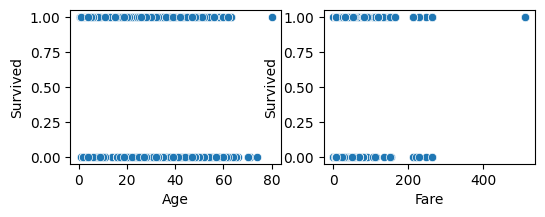

In [212]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Survived', data=train)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Fare', y='Survived', data=train)

<Axes: >

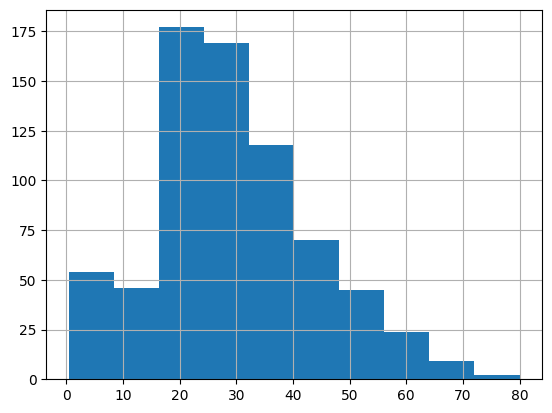

In [213]:
train.Age.hist()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<function matplotlib.pyplot.show(close=None, block=None)>

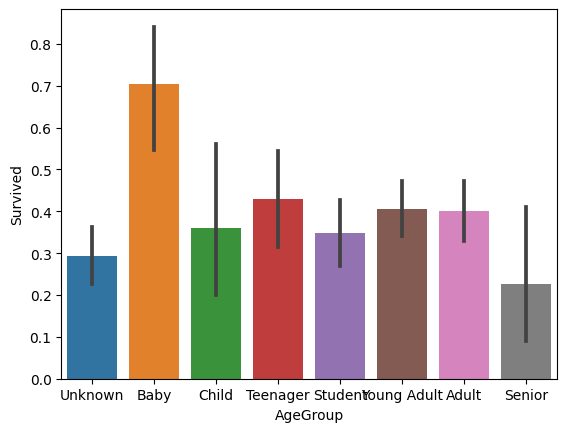

In [214]:
train["Age"]= train["Age"].fillna(-0.5)
test["Age"]= test["Age"].fillna(-0.5)

bins = [-1,0,5,12,18,24,35,60,np.inf]
labels=["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Senior"]

train["AgeGroup"]=pd.cut(train["Age"],bins,labels=labels)
test["AgeGroup"]=pd.cut(train["Age"],bins,labels=labels)
sns.barplot(x="AgeGroup",y="Survived",data=train)
plt.show

<Axes: xlabel='CabinBool', ylabel='Survived'>

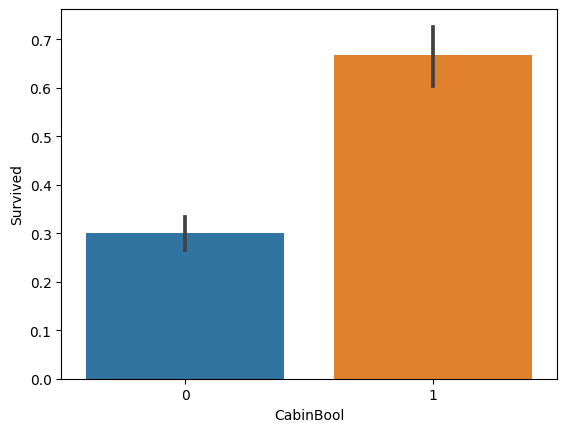

In [215]:
train["CabinBool"] = train["Cabin"].notnull().astype("int")
test["CabinBool"] = test["Cabin"].notnull().astype("int")
sns.barplot(x="CabinBool", y="Survived", data=train)

In [216]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CabinBool
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,23.941388,0.447368,0.392344,35.627188,0.217703
std,120.810458,0.841838,17.741080,0.896760,0.981429,55.907576,0.413179
min,892.000000,1.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,9.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [217]:
train= train.drop(["Ticket"], axis=1)
test = test.drop(["Ticket"], axis=1)

train = train.drop(["Cabin"], axis=1)
test = test.drop(["Cabin"], axis=1)

train = train.drop(["Name"], axis=1)
test = test.drop(["Name"], axis=1)

train = train.drop(["Age"], axis=1)
test = test.drop(["Age"],axis=1)

sex_map = {"Unknown":0, "Baby":1, "Child":2, "Teenager":3, "Student":4, "Young Adult":5, "Adult":6, "Senior":7}
train["AgeGroup"] = train["AgeGroup"].map(sex_map)
test["AgeGroup"] = test["AgeGroup"].map(sex_map)

In [218]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
AgeGroup       0
CabinBool      0
dtype: int64

In [219]:
train = train.fillna({"Embarked":0})

/tmp/ipykernel_35/1660552926.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.fillna({"Embarked":0})


In [220]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
CabinBool      0
dtype: int64

In [221]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
AgeGroup       0
CabinBool      0
dtype: int64

In [222]:
test = test.fillna({"Fare":test["Fare"].mean()})

In [223]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
CabinBool      0
dtype: int64

In [224]:
test.columns == [c for c in train.columns if c != "Survived"]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [225]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,0,1,0,7.2500,0,4,0
1,2,1,1,1,1,0,71.2833,1,6,1
2,3,1,3,1,0,0,7.9250,0,5,0
3,4,1,1,1,1,0,53.1000,0,5,1
4,5,0,3,0,0,0,8.0500,0,5,0


In [229]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    n_estimators=20, 
    max_depth=4,  
    learning_rate=0.1,
    num_leaves=10   
)

categorical_feats = ['Pclass', 'Sex', 'Embarked', 'CabinBool', 'AgeGroup', 'SibSp', 'Parch']
for col in categorical_feats:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

oof_train = np.zeros((len(train), 1))
oof_test = np.zeros((len(test),1))
target = train.Survived
train = train.drop(["Survived"],axis=1)
n = 5

train["Sex"] = train["Sex"].astype(int)
test["Sex"] = test["Sex"].astype(int)

train["Embarked"] = train["Embarked"].astype(int)
test["Embarked"] = test["Embarked"].astype(int)

fold = KFold(n_splits=n, shuffle=True, random_state=42)
for train_ids, valid_ids in fold.split(train):
    x_train, y_train = train.loc[train_ids], target.loc[train_ids]
    x_valid, y_valid = train.loc[valid_ids], target.loc[valid_ids]
    model.fit(x_train, y_train, categorical_feature=categorical_feats)

    oof_train[valid_ids] = model.predict(x_valid).reshape(-1, 1)
    oof_test += model.predict(test).reshape(-1, 1)

oof_test = oof_test / n

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Info] Number of positive: 275, number of negative: 438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 9
[LightGBM] [Info] [binary:BoostFro

In [230]:
model.score(train, target)

0.8372615039281706

In [231]:
y_pred = model.predict(test)
ids = test.PassengerId

In [232]:
output = pd.DataFrame({"PassengerId":ids, "Survived":y_pred})
output.to_csv("submission.csv", index=False)